### Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos

### Entregas

Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
Responda também às seguintes perguntas:
Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
Existe algum padrão no texto do nome do local para lugares de mais alto valor?
Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

Salve o modelo desenvolvido no formato .pkl.
A entrega deve ser feita através de um repositório de código público que contenha:
README explicando como instalar e executar o projeto
Arquivo de requisitos com todos os pacotes utilizados e suas versões
Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
Arquivo .pkl conforme passo 5 acima.
Todos os códigos produzidos devem seguir as boas práticas de codificação.


#### Dicionário dos dados

##### A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

 * id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
 * nome - Representa o nome do anúncio
 * host_id - Representa o id do usuário que hospedou o anúncio
 * host_name – Contém o nome do usuário que hospedou o anúncio
 * bairro_group - Contém o nome do bairro onde o anúncio está localizado
 * bairro - Contém o nome da área onde o anúncio está localizado
 * latitude - Contém a latitude do local
 * longitude - Contém a longitude do local
 * room_type – Contém o tipo de espaço de cada anúncio
 * price - Contém o preço por noite em dólares listado pelo anfitrião
 * minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
 * numero_de_reviews - Contém o número de comentários dados a cada listagem
 * ultima_review - Contém a data da última revisão dada à listagem
 * reviews_por_mes - Contém o número de avaliações fornecidas por mês
 * calculado_host_listings_count - Contém a quantidade de listagem por host
 * disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

### Conhecendo a base de dados:

### Dataset

In [575]:
# Importando a base de dados

import pandas as pd
tabela = pd.read_csv("teste_indicium_precificacao.csv")

# Visualizando as 5 primeiras linhas

tabela.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [576]:
# Visualizando as 5 últimas linhas

tabela.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Características gerais da base de dados

In [577]:
# Imprimindo a quantidade de linhas e colunas da tabela

tabela.shape

(48894, 16)

In [578]:
# Imprimindo as colunas existentes na tabela

tabela.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

### Entregas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

# Análise Exploratória dos Dados

In [579]:
# Observando os dados nulos, os tipos de dados e os valores únicos

import numpy as np

pd.DataFrame({'valores_nulos':np.round(tabela.isnull().mean(), 2),
              'tipo_dados': tabela.dtypes,
              'valores_unicos': tabela.nunique()})

,valores_nulos,tipo_dados,valores_unicos
id,0.00,int64,48894
nome,0.00,object,47904
host_id,0.00,int64,37457
host_name,0.00,object,11452
bairro_group,0.00,object,5
bairro,0.00,object,221
latitude,0.00,float64,19048
longitude,0.00,float64,14718
room_type,0.00,object,3
price,0.00,int64,674


##### Observações:

* ultima_review e reviews_por_mes possuem 21% de valores nulos.
* host_id aparece como inteiro e ultima_review aparece como objeto.

In [580]:
# Transformando o tipo de dado de host_id para categórico e de ultima_review para data

tabela["host_id"] = tabela.host_id.astype('category')
tabela["ultima_review"] = pd.to_datetime(tabela.ultima_review)

In [581]:
tabela.dtypes

id                                        int64
nome                                     object
host_id                                category
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

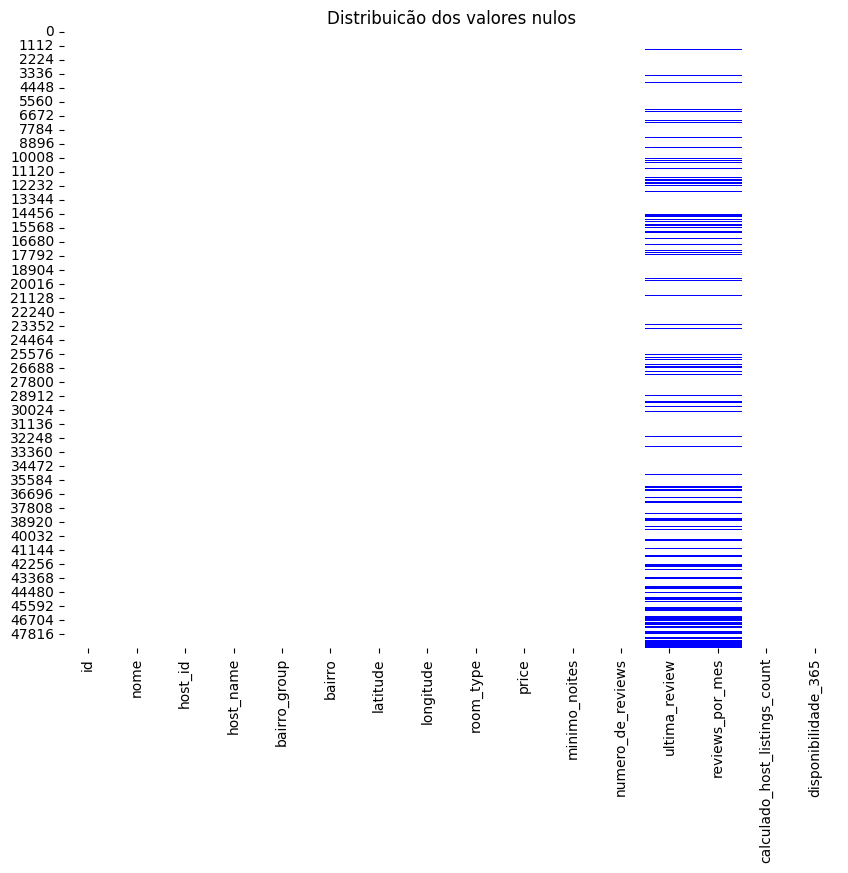

In [582]:
# Observando a distribuição das variáveis nulas

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.heatmap(tabela.isnull(), cmap = ["white", "blue"], cbar = False)

plt.title("Distribuicão dos valores nulos")

plt.show()

##### Observando a densidade das variáveis numéricas:

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>],
       [<Axes: title={'center': 'calculado_host_listings_count'}>,
        <Axes: title={'center': 'disponibilidade_365'}>]], dtype=object)

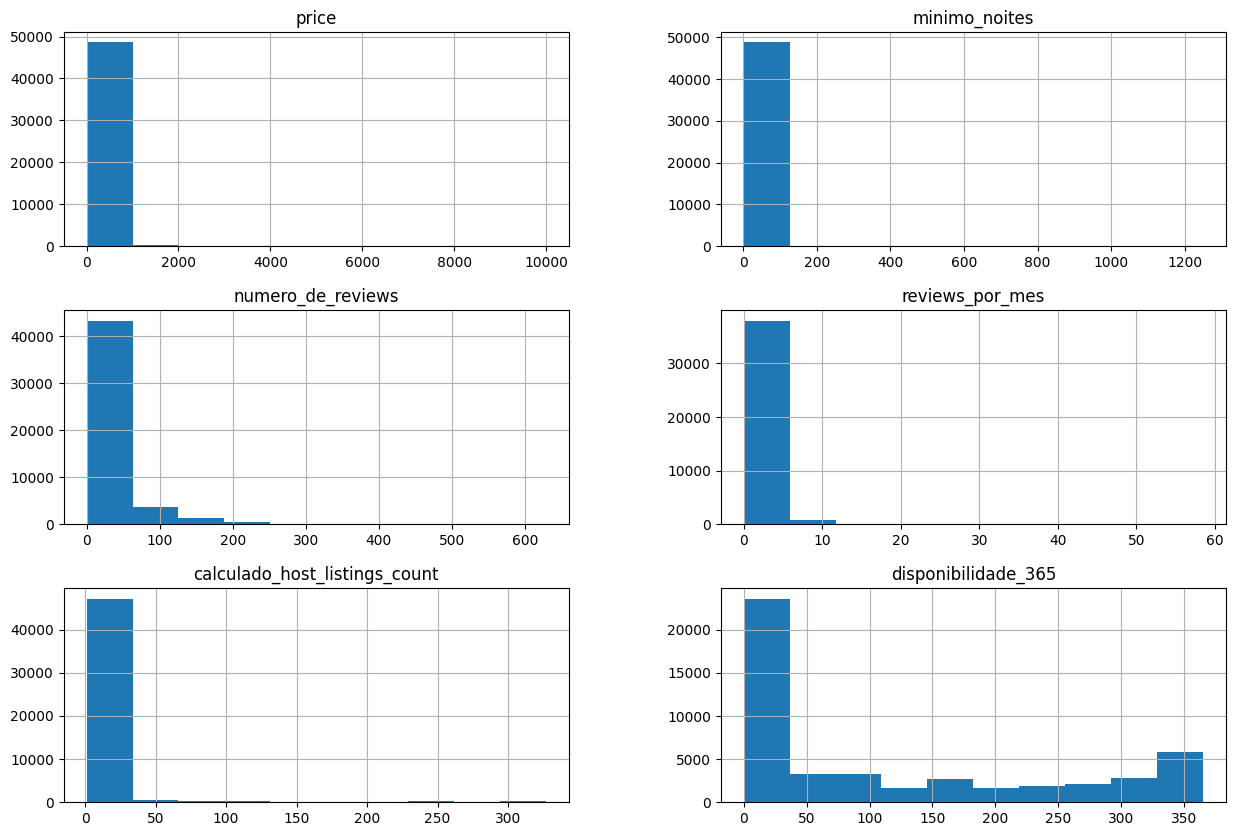

In [583]:
tabela.hist(['price', 'minimo_noites', 'numero_de_reviews',
                'reviews_por_mes', 'calculado_host_listings_count','disponibilidade_365'], bins = 10, figsize = (15, 10))

* Ao analisarmos os gráficos, podemos notar a presença de outliers. A variável disponibilidade_365 têm uma variação mais distribuida, contudo, ainda tem alguns picos.

Faremos uma análise estatística para entender melhor o comportamento das amostras.



In [584]:
# Analisando estatisticamente as colunas numéricas

lista_numericas = ['price', 'minimo_noites', 'numero_de_reviews',
                'reviews_por_mes', 'calculado_host_listings_count','disponibilidade_365']

tabela[lista_numericas].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Podemos perceber, por exemplo, que 75% dos preços estão abaixo de 175, que 50% estão abaixo de 106 e que o preço máximo é de 10000.

In [585]:
# Analisando estatisticamente as colunas categóricas

tabela.describe(include = "O")

,nome,host_name,bairro_group,bairro,room_type
count,48878,48873,48894,48894,48894
unique,47904,11452,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


##### Observando a densidade das variáveis numéricas novamente:

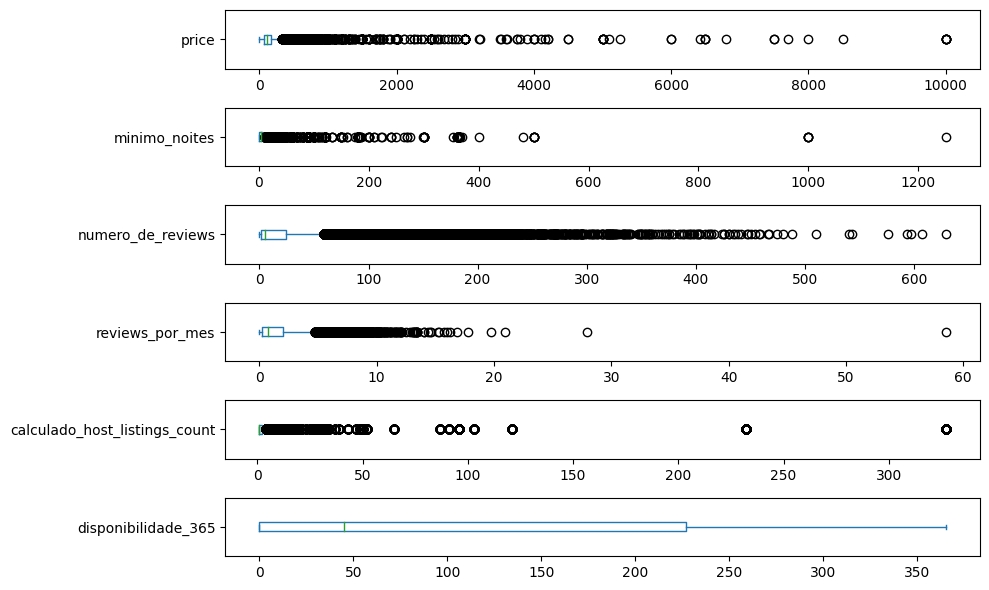

In [586]:
fig, ax = plt.subplots(6, 1, figsize=(10,6))

indice = 0
for i in lista_numericas:
    indice += 1
    plt.subplot(6, 1, indice)
    tabela[i].plot(kind='box', vert=False)
plt.tight_layout()

##### Removendo os outliers pelo método do intervalo interquartil:

In [587]:
quartil_1 = tabela[lista_numericas].quantile(0.25)
quartil_3 = tabela[lista_numericas].quantile(0.75)
IQR = quartil_3 - quartil_3

# Criando um filtro para identificar linhas sem outliers

filtro_outliers = ~((tabela[lista_numericas] < (quartil_1 - 1.5 * IQR)) | (tabela[lista_numericas] > (quartil_3 + 1.5 * IQR))).any(axis=1)

# Criando um novo DataFrame sem outliers

dados_sem_outliers = tabela[filtro_outliers]

dados_sem_outliers.shape

(4375, 16)

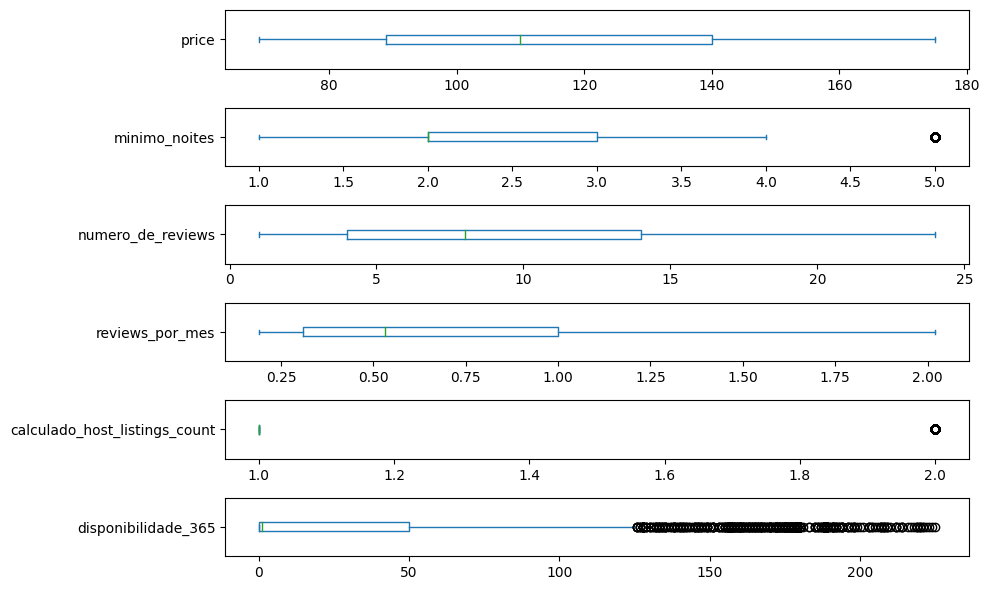

In [588]:
fig, ax = plt.subplots(6, 1, figsize=(10,6))

indice = 0
for i in lista_numericas:
    indice += 1
    plt.subplot(6, 1, indice)
    dados_sem_outliers[i].plot(kind='box', vert=False)
plt.tight_layout()

Agora conseguimos ver que os dados numéricos estão melhor distribuidos, sem a presença dos outliers.

In [589]:
# Criando dados numéricos sem outliers:

dados_numericos_novos = dados_sem_outliers[lista_numericas]
display(dados_numericos_novos)

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
125,150,5,21,0.19,1,189
178,100,2,18,1.79,1,0
197,80,2,11,0.48,1,0
209,71,2,23,0.22,1,91
240,135,2,21,0.20,1,0
...,...,...,...,...,...,...
48614,150,1,1,1.00,1,165
48633,110,3,2,2.00,1,15
48731,150,4,1,1.00,1,13
48781,129,1,1,1.00,1,147


In [590]:
# Removendo outliers do dataframe principal:

dados_novos = tabela.loc[dados_numericos_novos.index.tolist()]
display(dados_novos)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
125,28907,Garden studio in the Upper East Sid,124352,Lisa,Manhattan,Upper East Side,40.77800,-73.94822,Entire home/apt,150,5,21,2017-08-15,0.19,1,189
178,45542,Clean and Cozy Harlem Apartment,202249,Campbell,Manhattan,Harlem,40.82374,-73.93730,Entire home/apt,100,2,18,2018-12-17,1.79,1,0
197,53196,Big Room/Washer-Dryer/Wifi/AC/JMZ,247432,Charlotte,Brooklyn,Bedford-Stuyvesant,40.69546,-73.93503,Private room,80,2,11,2017-11-13,0.48,1,0
209,55498,Modern comfort in art infused landmark Brownstone,262138,Tami,Brooklyn,Bedford-Stuyvesant,40.68290,-73.93549,Private room,71,2,23,2019-07-01,0.22,1,91
240,61167,Colorful Private One Bedroom Apt,295760,Greta,Manhattan,Little Italy,40.71961,-73.99540,Entire home/apt,135,2,21,2015-12-12,0.20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48614,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.00,1,165
48633,36351128,"One bedroom without roomies, close to everything",273361532,David & Amy,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,2,2019-07-05,2.00,1,15
48731,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,1,2019-07-06,1.00,1,13
48781,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147


### Analisando os dados pela localização

In [591]:
# plotando o mapa

import plotly.express as px
fig = px.scatter_mapbox(dados_novos, lat="latitude", lon="longitude", color_discrete_sequence=["blue"],
                        zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-592-db012b0ebd17>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



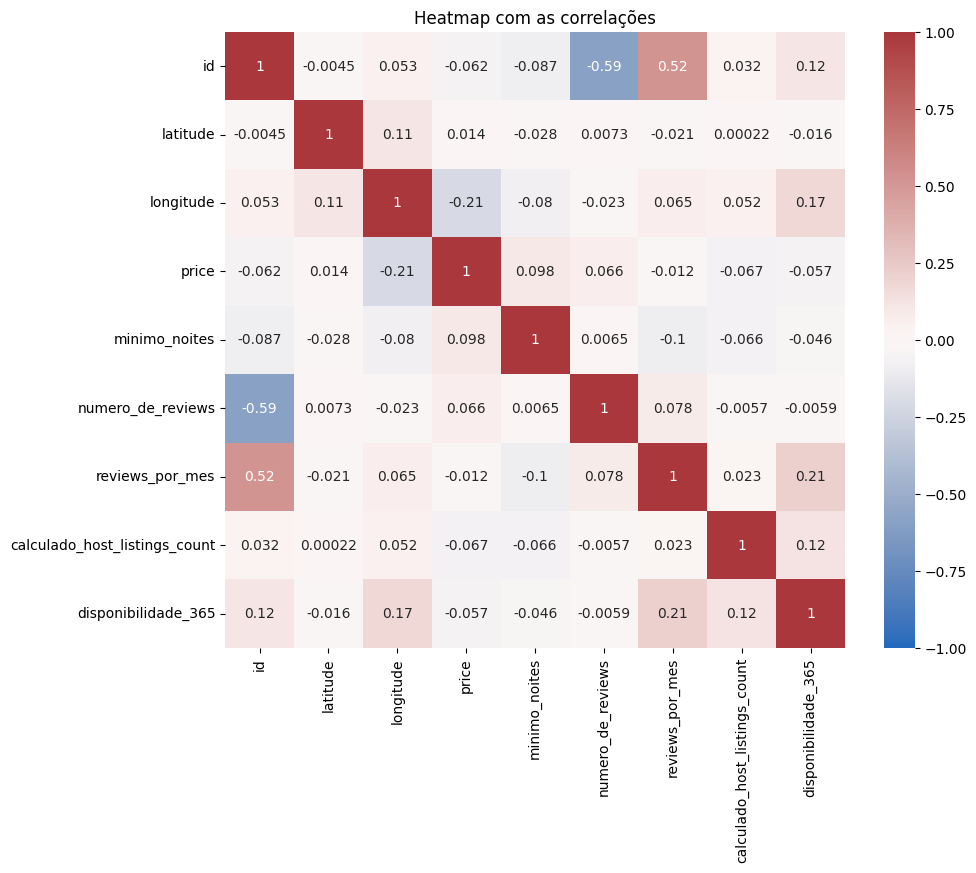

In [592]:
# plotando o gráfico

plt.figure(figsize=(10, 8))

sns.heatmap(dados_novos.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.title('Heatmap com as correlações')
plt.show()


Podemos observar através do gráfico acima que as variáveis que mais se relacionam ao preço são latitude e longitude, as quais indicam a localização.

2. Responda também às seguintes perguntas:


a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [593]:
dados_novos.groupby('bairro_group').agg({'bairro_group': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False)

,bairro_group,price
bairro_group,,
Manhattan,1892,119.711945
Brooklyn,1982,112.283552
Queens,420,101.633333
Bronx,55,99.400000
Staten Island,26,97.038462


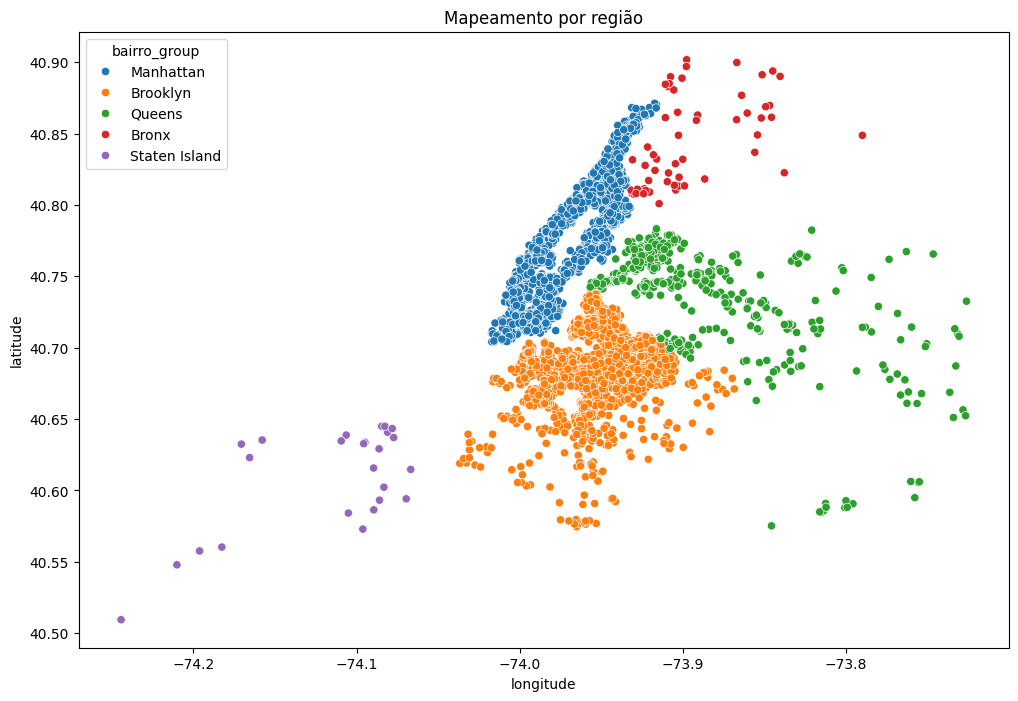

In [594]:
# plotando o gráfico

fig, ax = plt.subplots(figsize = (12,8))

ax = sns.scatterplot(data=dados_novos, y="latitude", x="longitude", hue='bairro_group')
ax.set_title('Mapeamento por região')
plt.show()

Quanto maior a procura , mais caras são as regiões. É mais indicado comprar em Manhattan, pois poderia alugar por um preço maior posteriormente.

b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


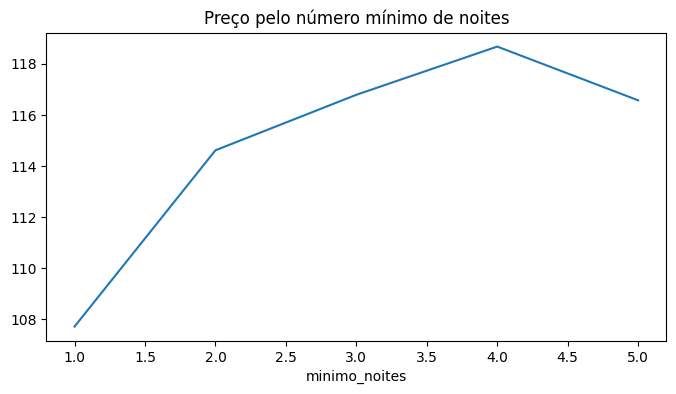

In [595]:
# plotando o gráfico

plt.figure(figsize=(8,4))

dados_novos.groupby('minimo_noites')['price'].mean().plot()
plt.title('Preço pelo número mínimo de noites')
plt.show()

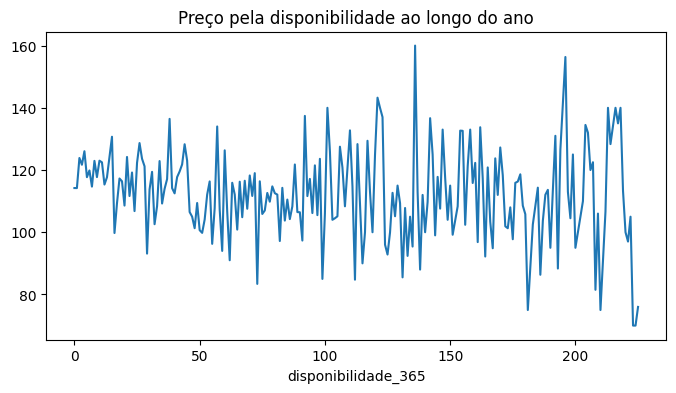

In [596]:
# plotando o gráfico

plt.figure(figsize=(8,4))

dados_novos.groupby('disponibilidade_365')['price'].mean().plot()
plt.title('Preço pela disponibilidade ao longo do ano')
plt.show()

Quanto maior for o número de noites, menor será o preço. Contudo, nota-se graficamente que a disponibilidade ao longo do ano não interfere no preço, este oscila ao longo do ano.

c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [597]:
preco = dados_novos.groupby(['bairro_group', 'latitude', 'longitude'])['price'].mean().round(2).sort_values(ascending=False)
display(preco)

bairro_group  latitude  longitude
Brooklyn      40.69335  -73.99840    175.0
Manhattan     40.78526  -73.97633    175.0
Brooklyn      40.71002  -73.96333    175.0
              40.71013  -73.96517    175.0
              40.68046  -73.94277    175.0
                                     ...  
              40.71926  -73.95485     69.0
              40.69288  -73.96101     69.0
Bronx         40.86493  -73.90315     69.0
Brooklyn      40.70275  -73.93288     69.0
              40.72769  -73.94309     69.0
Name: price, Length: 4375, dtype: float64

Não há um padrão no texto do nome do local para lugares de mais alto valor. Há um padrão na localização. Os lugares mais caros ficam próximos.

# Machine Learning

In [598]:
# separando um conjunto de dados somente para teste

dados_teste = dados_novos.sample(frac=0.1, random_state=1)

# conjunto de dados treino e validação do modelo

dados_treino_validacao = dados_novos.drop(dados_teste.index.tolist())

In [599]:
variaveis_treinamento = ['host_id', 'latitude', 'longitude', 'room_type', 'minimo_noites', 'numero_de_reviews',
                'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

In [600]:
from sklearn.model_selection import train_test_split

# separando o X e y

X = dados_treino_validacao[variaveis_treinamento]
y = dados_treino_validacao.price

# separando em treino e validação

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=1)

# checando as dimensões

print(X_treino.shape, X_validacao.shape, y_treino.shape, y_validacao.shape)

(3149, 9) (788, 9) (3149,) (788,)


### Transformando os dados

In [601]:
# Transformanto a variável categórica room_type em uma variável numérica para poder treinar o modelo:

from sklearn.preprocessing import LabelEncoder

X_treino_enc = X_treino.copy()
X_validacao_enc = X_validacao.copy()

le = LabelEncoder()

# treinando com os dados de treino

le.fit(X_treino['room_type'])

# realizando as transformações

X_treino_enc['room_type'] = le.transform(X_treino['room_type'])
X_validacao_enc['room_type'] = le.transform(X_validacao['room_type'])

# visualizando o resultado

X_treino_enc.head()

,host_id,latitude,longitude,room_type,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
43010,30751157,40.69945,-73.90771,1,3,4,1.88,1,68
7684,13501779,40.67169,-73.95117,0,2,14,0.28,2,0
27645,7118588,40.72683,-73.95905,0,4,4,0.20,1,3
32746,6328069,40.69382,-73.95072,0,2,5,0.43,1,0
28531,102011406,40.78977,-73.94760,1,4,16,0.87,1,130


### Definindo a baseline

Para validarmos os modelos, serão usadas as seguintes métricas:

* MSE: Mean Squared Error
* MAE: Mean Absolute Error
* R^2: R squared

In [602]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = LinearRegression()

# treinando com os dados que separamos

reg.fit(X_treino_enc, y_treino)

# realizando as previsões tanto nos dados de treino quanto no de validação

y_pred_treino = reg.predict(X_treino_enc)
y_pred_validacao = reg.predict(X_validacao_enc)

print(f'Previsão nos dados de TREINO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_treino, y_pred_treino)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_treino, y_pred_treino)}')
print(f'R2 score: {r2_score(y_treino, y_pred_treino)}\n')

print(f'Previsão nos dados de VALIDAÇÃO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_validacao, y_pred_validacao)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_treino, y_pred_treino)}')
print(f'R2 score: {r2_score(y_validacao, y_pred_validacao)}')

Previsão nos dados de TREINO:
-----------------------------------------------------
Mean Squared Error: 708.092923668078
Mean Absolute Error: 21.767270264725248
R2 score: 0.27196376507123965

Previsão nos dados de VALIDAÇÃO:
-----------------------------------------------------
Mean Squared Error: 694.9621085935462
Mean Absolute Error: 21.767270264725248
R2 score: 0.22837821855084028


### Modelo árvore de decisão

In [603]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_treino_enc, y_treino)
y_pred_treino = dtr.predict(X_treino_enc)
y_pred_validacao = dtr.predict(X_validacao_enc)

print(f'Previsão nos dados de TREINO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_treino, y_pred_treino)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_treino, y_pred_treino)}')
print(f'R2 score: {r2_score(y_treino, y_pred_treino)}\n')

print(f'Previsão nos dados de VALIDAÇÃO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_validacao, y_pred_validacao)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_validacao, y_pred_validacao)}')
print(f'R2 score: {r2_score(y_validacao, y_pred_validacao)}')


Previsão nos dados de TREINO:
-----------------------------------------------------
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2 score: 1.0

Previsão nos dados de VALIDAÇÃO:
-----------------------------------------------------
Mean Squared Error: 1254.4708121827412
Mean Absolute Error: 27.166243654822335
R2 score: -0.39284860412231426


In [604]:
# Variação no treino do modelo

# criando uma lista para as variáveis de entrada

variaveis_treinamento = ['host_id', 'latitude', 'longitude', 'room_type', 'reviews_por_mes']

# separando o X e y

X = dados_treino_validacao[variaveis_treinamento]
y = dados_treino_validacao.price

# separando em treino e validação

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=1)

# checando as dimensões

print(X_treino.shape, X_validacao.shape, y_treino.shape, y_validacao.shape)

# cópias dos conjuntos de dados

X_treino_enc = X_treino.copy()
X_validacao_enc = X_validacao.copy()

le = LabelEncoder()

# treinando com os dados de treino

le.fit(X_treino['room_type'])

# realizando as transformações

X_treino_enc['room_type'] = le.transform(X_treino['room_type'])
X_validacao_enc['room_type'] = le.transform(X_validacao['room_type'])

# preenchendo os dados nulos

X_treino_enc['reviews_por_mes'] = X_treino_enc['reviews_por_mes']
X_validacao_enc['reviews_por_mes'] = X_validacao_enc['reviews_por_mes']

# visualizando o resultado

X_treino_enc.head()

(3149, 5) (788, 5) (3149,) (788,)


,host_id,latitude,longitude,room_type,reviews_por_mes
43010,30751157,40.69945,-73.90771,1,1.88
7684,13501779,40.67169,-73.95117,0,0.28
27645,7118588,40.72683,-73.95905,0,0.20
32746,6328069,40.69382,-73.95072,0,0.43
28531,102011406,40.78977,-73.94760,1,0.87


In [605]:
dtr.fit(X_treino_enc, y_treino)
y_pred_treino = dtr.predict(X_treino_enc)
y_pred_validacao = dtr.predict(X_validacao_enc)

print(f'Previsão nos dados de TREINO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_treino, y_pred_treino)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_treino, y_pred_treino)}')
print(f'R2 score: {r2_score(y_treino, y_pred_treino)}\n')

print(f'Previsão nos dados de VALIDAÇÃO:')
print('-----------------------------------------------------')
print(f'Mean Squared Error: {mean_squared_error(y_validacao, y_pred_validacao)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_validacao, y_pred_validacao)}')
print(f'R2 score: {r2_score(y_validacao, y_pred_validacao)}')

Previsão nos dados de TREINO:
-----------------------------------------------------
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2 score: 1.0

Previsão nos dados de VALIDAÇÃO:
-----------------------------------------------------
Mean Squared Error: 1243.9631979695432
Mean Absolute Error: 27.130710659898476
R2 score: -0.3811819191366004


### Previsão nos dados de teste

In [606]:
dados_teste.head

<bound method NDFrame.head of              id                                               nome    host_id  \
35269  27964410      Sunny Brooklyn Apartment With Private Terrace   16533479   
16353  13153768          Bright Room w/ a Brilliant Manhattan View    4218058   
43698  33810599   Furnished modern studio luxury elevator building   28175069   
27411  21619743      Cute one-bedroom apartment with exposed brick    9450412   
34228  27142225              Lovely Brownstone in Brooklyn Heights     624101   
...         ...                                                ...        ...   
37045  29455764         Single room in a 2-br apartment in the UWS   92657816   
41697  32421217            Canadian Rustic Modern Loft, Greenpoint  189114879   
42509  32991956  Charming cozy 1 bedroom in the heart of Greenp...    4158712   
20477  16315325   Sunny Basement Studio Apartment, 1 block to Park   13741210   
41307  32165550           Your NY Home in a multicultural setting!   68959402  

3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Faria a previsão dividindo as variáveis em dados de treino e dados de teste. Escolheria váriaveis numéricas para treinar o modelo, e posteriormente transformaria a variável room-type em uma variável numérica. Trabalharia com variáveis numéricas pois ML modela apenas atráves delas. Estamos reseolvendo um problema de regressão, pois a variável que queremos prever (preço) é uma variável numérica. O modelo escolhido foi o de árvore de decisão. Tem como prós a flexibilidade e pouca preparaçao de dados, os contras são tendência ao overfitting, por exemplo.

4. Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

In [607]:
preco = dados_teste.groupby(['bairro_group', 'bairro', 'room_type'])['price'].mean().round(2).sort_values(ascending=False)
display(preco)

bairro_group  bairro               room_type      
Manhattan     Midtown              Entire home/apt    175.00
              SoHo                 Entire home/apt    173.00
Queens        Woodhaven            Entire home/apt    170.00
Manhattan     Greenwich Village    Entire home/apt    161.67
Brooklyn      Cypress Hills        Entire home/apt    160.00
                                                       ...  
Queens        Springfield Gardens  Private room        70.00
Manhattan     Civic Center         Private room        70.00
Queens        Woodhaven            Private room        70.00
              Flushing             Entire home/apt     70.00
              Elmhurst             Private room        69.00
Name: price, Length: 113, dtype: float64

Sugestão de preço: 175,00 U$, baseando-se no bairro (Midtown), na região na qual se encontra (Manhattan) e no tipo de quarto.